In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

#city_data_df.head()
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [23]:
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
city_ride_data_df = pd.merge(city_data_df, ride_data_df,
                                 how='outer', on='city')
city_ride_data_df.head()
#city_ride_data_df["type"].value_counts()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [5]:
#Prepare chart data for Urban city ride 
urban_city_ride_data_df = city_ride_data_df.loc[city_ride_data_df["type"] == "Urban"]
urban_grouped_cityride_df = urban_city_ride_data_df.groupby(['city'])
urban_city_avg_fare = urban_grouped_cityride_df["fare"].mean()
urban_city_avg_fare.head()
urban_city_rides = urban_grouped_cityride_df["ride_id"].count()
urban_city_rides.head()
urban_city_drivers=urban_grouped_cityride_df["driver_count"].mean()
urban_city_drivers.head()
urban_city_type = urban_grouped_cityride_df["type"]

#Prepare chart data for Suburban city ride
suburban_city_ride_data_df = city_ride_data_df.loc[city_ride_data_df["type"] == "Suburban"]
suburban_grouped_cityride_df = suburban_city_ride_data_df.groupby(['city'])
suburban_city_avg_fare = suburban_grouped_cityride_df["fare"].mean()
suburban_city_avg_fare.head()
suburban_city_rides = suburban_grouped_cityride_df["ride_id"].count()
suburban_city_rides.head()
suburban_city_drivers=suburban_grouped_cityride_df["driver_count"].mean()
suburban_city_drivers.head()
suburban_city_type = suburban_grouped_cityride_df["type"]

#Prepare chart data for Rural city ride
rural_city_ride_data_df = city_ride_data_df.loc[city_ride_data_df["type"] == "Rural"]
rural_grouped_cityride_df = rural_city_ride_data_df.groupby(['city'])
rural_city_avg_fare = rural_grouped_cityride_df["fare"].mean()
rural_city_avg_fare.head()
rural_city_rides = rural_grouped_cityride_df["ride_id"].count()
rural_city_rides.head()
rural_city_drivers=rural_grouped_cityride_df["driver_count"].mean()
rural_city_drivers.head()
rural_city_type = rural_grouped_cityride_df["type"]

#urban_grouped_cityride_df.head()
#suburban_city_ride_data_df.head()
#rural_city_ride_data_df.head()

In [6]:
# Creating a new DataFrame
urban_cityride_summary_table = pd.DataFrame({"Average fare":urban_city_avg_fare,
                                   "Total number of rides":urban_city_rides,
                                    "Total number of drivers": urban_city_drivers
                                    })
urban_cityride_summary_table.head()


,Average fare,Total number of drivers,Total number of rides
city,,,
Alvarezhaven,23.928710,21,31
Alyssaberg,20.609615,67,26
Antoniomouth,23.625000,21,22
Aprilchester,21.981579,49,19
Arnoldview,25.106452,41,31


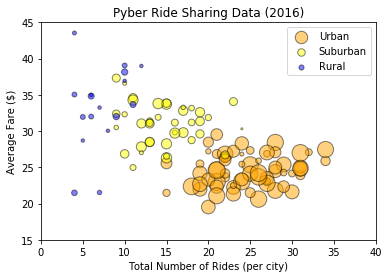

In [8]:
#create handles for each plot
urban =plt.scatter(urban_city_rides,urban_city_avg_fare,s=urban_city_drivers*4, alpha=0.5, facecolors="orange", edgecolors="black")
suburban =plt.scatter(suburban_city_rides,suburban_city_avg_fare,s=suburban_city_drivers*4, alpha=0.5, facecolors="yellow", edgecolors="black")
rural =plt.scatter(rural_city_rides,rural_city_avg_fare,s=rural_city_drivers*4, alpha=0.5, facecolors="blue", edgecolors="black")

# Set our legend to where the chart thinks is best
plt.legend((urban,suburban,rural),('Urban','Suburban','Rural'), loc="best")

plt.xlim(0, 40)
plt.ylim(15, 45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.show()

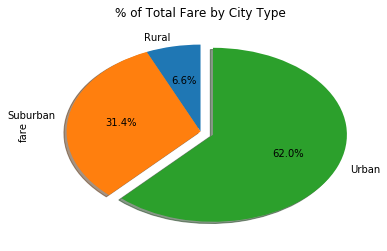

In [27]:
# Total fare by city type
total_fare = city_ride_data_df['fare'].sum()
#print ("total fare:" + str(total_fare))

groupedbyType_df = city_ride_data_df.groupby(['type'])
type_total_fare = groupedbyType_df["fare"].sum()
type_total_fare.head()

# Create a pie chart based upon the trip duration of that single bike
type_pie = type_total_fare.plot(kind="pie", y=type_avg_fare/total_fare, title=("% of Total Fare by City Type"), shadow=True, startangle=90, explode=(0,0,0.1), autopct="%1.1f%%" )


plt.show()


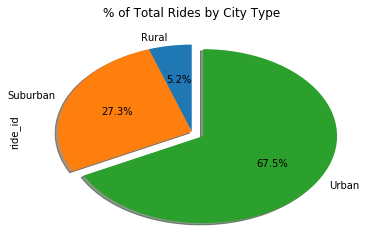

In [28]:

# Total rides by city type
total_rides = city_ride_data_df['ride_id'].count()
#print ("total rides:" + str(total_rides))

groupedbyType_df = city_ride_data_df.groupby(['type'])
type_total_rides = groupedbyType_df["ride_id"].count()
type_total_rides.head()

# Create a pie chart based upon the trip duration of that single bike
type_pie = type_total_rides.plot(kind="pie", y=type_total_rides/total_rides, title=("% of Total Rides by City Type"), shadow=True, startangle=90, explode=(0,0,0.1), autopct="%1.1f%%" )

plt.show()


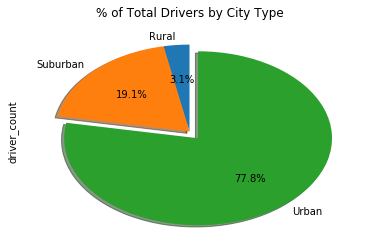

In [29]:
# Total drivers by city type

total_drivers = city_data_df['driver_count'].sum()
#print("Total drivers " + str(total_drivers) )

groupedDriversbyType_df = city_data_df.groupby(['type'])
type_total_drivers = groupedDriversbyType_df["driver_count"].sum()
type_total_drivers.head()

# Create a pie chart based upon the trip duration of that single bike
type_pie = type_total_drivers.plot(kind="pie", y=type_total_drivers/total_drivers, title=("% of Total Drivers by City Type"), shadow=True, startangle=90, explode=(0,0,0.1), autopct="%1.1f%%" )


plt.show()